# Encontro amigos

Este projeto tem como objetivo implementar, por meio de um método de dividir e conquistar, uma modo que facilita o encontro de vários amigos espalhados em uma festa, ou seja, estes amigos vão ser pontos em plano cartesiano e assim vamos utilizar o algoritmo que identifica o par de pontos mais próximos e consequentemente vamos juntar estes pontos, aplicando o algoritmo novamente para que todos os amigos possam se encontrar.

In [87]:
%pip install numpy
%pip install matplotlib
%pip install names

# Numpy será utilizada para gerar as coordenadas dos amigos de forma aleatória
import numpy as np
# Pyplot ajudará a plotar os gráficos
import matplotlib.pyplot as plt

# A função FuncAnimation vai plotar o gráfico de maneira animada, ajudando a entender quais amigos se encontraram
from matplotlib.animation import FuncAnimation

# Biblioteca que gera nomes
import names

import math
import copy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Gerar a lista de amigos

In [88]:
# Uma classe para representar um ponto no plano 2D

class Amigo():
    def __init__(self, x, y, ind, nome):
        self.x = x
        self.y = y
        self.ind = ind
        self.nome = nome

In [89]:
def gerar_pontos_amigos(quantidade, dimensao):
    pontos = np.random.uniform(0, dimensao, size=(quantidade,2))
    amigos = []
    for i in range(quantidade):
        amigos.append(Amigo(pontos[i,0],pontos[i,1],i,names.get_first_name()))
    return amigos

In [90]:
quantidade_amigos = int(input('Digite a quantidade de amigos: '))

In [91]:
pontos_amigos = gerar_pontos_amigos(quantidade_amigos,40)

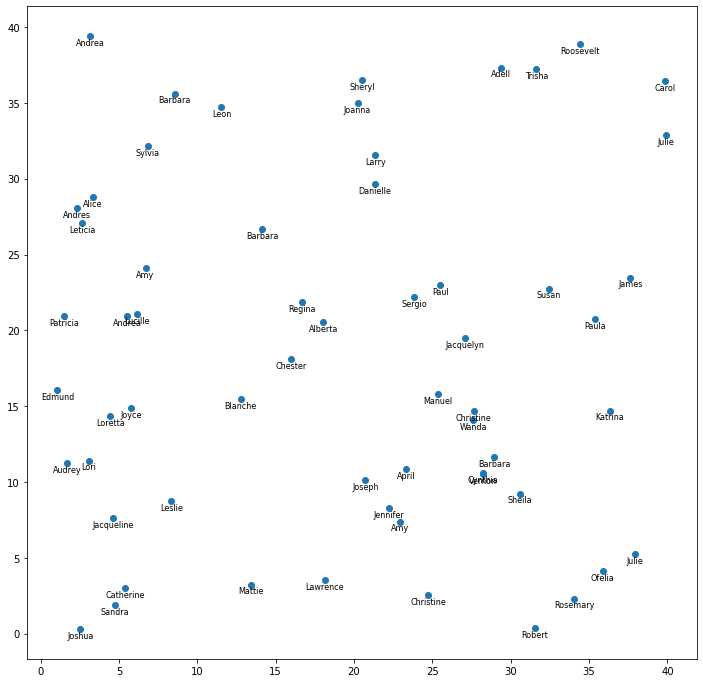

In [92]:
pontos_eixo_x = [amigo.x for amigo in pontos_amigos]
pontos_eixo_y = [amigo.y for amigo in pontos_amigos]
nomes_amigos = [amigo.nome for amigo in pontos_amigos]

fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(pontos_eixo_x,pontos_eixo_y)

for i,name in enumerate(nomes_amigos):
    ax.annotate(name,(pontos_eixo_x[i],pontos_eixo_y[i]-0.6),fontsize=8,ha='center')

plt.show()

## Dividir e conquistar

A implementação abaixo foi baseada no geeksforgeeks, porém foi modificada bruscamente para se adequar ao nosso trabalho, o objetivo do código é saber qual é o índice de algum ponto que pertence a dupla que possui menor distância

In [93]:
ans,indi,indj = float('inf'),0,0

In [94]:
# Função para encontrar a distância entre 2 pontos

def dist(p1, p2):
    return math.sqrt((p1.x - p2.x)**2 +
                     (p1.y - p2.y)**2)
 

# Método para retornar a menor distância entre 2 pontos

def bruteForce(P, n):
    min_val = float('inf')
    for i in range(n):
        for j in range(i + 1, n):
            if dist(P[i], P[j]) < min_val:
                min_val = dist(P[i], P[j])
                global ans,indi,indj
                if(min_val<ans):
                  ans = min_val
                  indi = P[i].ind
                  indj = P[j].ind
 
    return min_val
 
# Função para encontrar a distância entre os pontos mais próximos. Todos os pontos em strip []
# estão ordenados de acordo com o coordenada y. Esse método tem complexidade O(n), já que o loop
# roda no máximo 6 vezes.

def stripClosest(strip, size, d):
     
    # Iniciando a distância mínima como d
    min_val = d
 

    # Pegamos todos os pontos, um por um, e tentamos como os próximos pontos até 
    # que a diferença entre as coordenadas Y seja menor que d.
    # Isso prova que vai rodar no máximo 6 vezes.

    for i in range(size):
        j = i + 1
        while j < size and (strip[j].y -
                            strip[i].y) < min_val:
            min_val = dist(strip[i], strip[j])
            global ans,indi,indj
            if(min_val<ans):
              ans = min_val
              indi = strip[i].ind
              indj = strip[j].ind
            j += 1
 
    return min_val

# Função recursiva para encontrar a menor distância. O vetor p
# contém todos os pontos ordenados de acordo com o eixo X.

def closestUtil(P, Q, n):
     
    # Caso haja 2 ou 3 pontos, usamos a função bruteForce.
    if n <= 3:
        return bruteForce(P, n)
 
    # Encontrar o ponto do meio.
    mid = n // 2
    midPoint = P[mid]
 
    # Fazemos isso só para manter uma "cópia" das partes da esquerda e da direita.
    Pl = P[:mid]
    Pr = P[mid:]
 
    # Consideramos a linha vertical passando pelo ponto do meio e calculamos
    # a menor distância na esquerda (dl) do ponto do meio e a manor na direita (dr)
    dl = closestUtil(Pl, Q, mid)
    dr = closestUtil(Pr, Q, n - mid)
 
    # Encontramos o menor entre 2 distâncias.
    d = min(dl, dr)

    # Fazemos um array que contém alguns pontos próximos a linha
    # que passa pelo ponto médio.
    stripP = []
    stripQ = []
    lr = Pl + Pr
    for i in range(n):
        if abs(lr[i].x - midPoint.x) < d:
            stripP.append(lr[i])
        if abs(Q[i].x - midPoint.x) < d:
            stripQ.append(Q[i])
 
    stripP.sort(key = lambda point: point.y) # Fazemos a ordenação pelo eixo Y.
    min_a = min(d, stripClosest(stripP, len(stripP), d))
    min_b = min(d, stripClosest(stripQ, len(stripQ), d))
     
    # Encontramos os pontos mais próximos no array strip[].
    # Retorna o mínimo de d e o self.closest.
    return min(min_a,min_b)

# Main
def closest(P, n):
    global ans,indi,indj
    ans,indi,indj = float('inf'),0,0
    P.sort(key = lambda point: point.x)
    Q = copy.deepcopy(P)
    Q.sort(key = lambda point: point.y)   

    # Usamos a função recursiva já mencionada pra encontrar a menor distância.
    return closestUtil(P, Q, n)

Abaixo vamos criar uma versão interativa que vai simular o encontro dos amigos mais próximos até estes amigos todos se reunirem

In [95]:
def indice_amigo(pontos_amigos,indice):
    for i,amigo in enumerate(pontos_amigos):
        if amigo.ind == indice:
            return i

In [96]:
while True:
    if len(pontos_amigos) == 1:
        break
    d = closest(pontos_amigos,len(pontos_amigos))
    i = indi
    j = indj
    del(pontos_amigos[indice_amigo(pontos_amigos,i)])
    print(len(pontos_amigos))

59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
